<a href="https://colab.research.google.com/github/AyushAware/CAPM-Model/blob/main/CAPM_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Importing required libraries 

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas_datareader as pdr
import yfinance
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
pip install yfinance

In [16]:
#Importing data from yahoo finance

stocks = ['AAPL', '^GSPC']     #Ticker of apple and S%P 500(market)
start = dt.datetime(2015, 12, 1)
end = dt.datetime(2022, 1, 1)
data = yfinance.download(stocks, start, end)['Adj Close']   #For closing price

data.head()

[*********************100%***********************]  2 of 2 completed


,AAPL,^GSPC
Date,,
2015-12-01,26.977150,2102.629883
2015-12-02,26.733444,2079.510010
2015-12-03,26.485147,2049.620117
2015-12-04,27.365688,2091.689941
2015-12-07,27.193262,2077.070068


In [17]:
#Taking logarithm for better results

log_return = np.log(data/data.shift())
log_return.head()

,AAPL,^GSPC
Date,,
2015-12-01,NaN,NaN
2015-12-02,-0.009075,-0.011057
2015-12-03,-0.009331,-0.014478
2015-12-04,0.032706,0.020318
2015-12-07,-0.006321,-0.007014


# We will need beta to calculate returns

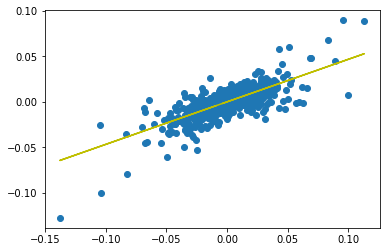

In [18]:
stock_1 = 'AAPL'
stock_2 = '^GSPC'
X = log_return[stock_1].iloc[1:].to_numpy().reshape(-1, 1)
Y = log_return[stock_2].iloc[1:].to_numpy().reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, Y)

beta = lin_reg.coef_[0, 0]
Y_predict = lin_reg.predict(X)

fig, ax = plt.subplots()
ax.scatter(X, Y)
ax.plot(X, Y_predict, c = 'y')

In [19]:
beta

0.4677787528215525

In [20]:
# Risk free return = 0.056
risk_free_return = 0.052
#Market return = 0.103
market_return = 0.103

#As per the CAPM formula

expected_return = risk_free_return + beta*(market_return - risk_free_return)

In [21]:
expected_return

0.07585671639389918